#  Fit Neff

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : February 7th 2022


- **kernel anaconda3_auxtel** at CC or **python 3** locally

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (8,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [3]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [4]:
from datetime import datetime,date

In [5]:
from astropy import units as u
from astropy.coordinates import Angle

In [6]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

In [7]:
string_date

'2022-02-08'

In [8]:
from iminuit import Minuit
import iminuit

In [9]:
iminuit.__version__

'2.7.0'

In [10]:
from time import sleep

In [11]:
from astropy.time import Time
import astropy.units as u

# Config

In [12]:
DATE="2021-07-07"
DATE2="2021_07_07"

In [13]:
DCCD   = 181.45 # mm
#DCCD   = 200.0 # mm
PIXELW = 0.01   # mm (10 microns)

In [14]:
def find_nearest_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [15]:
def Dispersion(wl,neff,D):
    """ 
    Dispersion(wl,a,D) : number of dx per wavelength
    input arguments:
    - wl : wavelength in mm
    - neff  : number of lines per mm
    - D  : Distance CCD-Hologram per mm
    
    recommended : all input arguments should be expressed in microns.
    
    - output : dx, x in mm and lambdas in mm
    """
    X=D*neff*wl/np.sqrt(1-(wl*neff)**2)
    return X



In [16]:
def Dispersion_Rate(wl,neff,D):
    """
    Dispersion_Rate(wl) : number of dx per wavelength
    input arguments:
    - wl : wavelength in mm
    - neff  : nb lines per mm 
    - D  : Distance CCD-Hologram in mm
    
    recommended : all input arguments should be expressed in microns.
    
    - output : dx/dlambda, x in mm and lambdas in mm
    
    """
    dxdlambda=D*neff*(np.sqrt(1-(wl*neff)**2)+ (wl*neff)**2)/(1-(wl*neff)**2)
    #dxdlambda=D*neff/(np.sqrt(1-(wl*neff)**2))**3
    return dxdlambda 

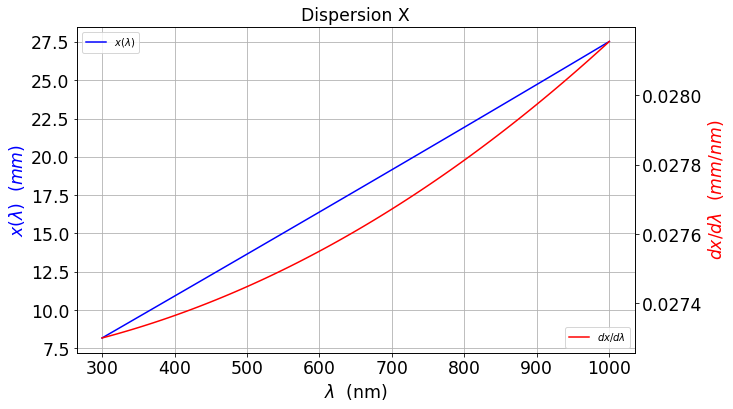

In [17]:
fig, ax1 = plt.subplots(figsize=(10,6))
WL=np.linspace(300.,1000.,100)
neff=150. # lines per mm
D=181.0 # mm

Y1=Dispersion(WL*1e-6,neff,DCCD)
ax1.plot(WL,Y1,"b",label="$x(\lambda)$")

ax1.set_xlabel("$\lambda$  (nm)")
ax1.set_ylabel("$x(\lambda)$  ($mm$)",color="blue")
ax1.set_title("Dispersion X")
ax1.legend(loc="upper left")
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

Y2=Dispersion_Rate(WL*1e-6,neff,DCCD)*1e-6 ## mm per nm
ax2.plot(WL, Y2,"r",label="$dx/d\lambda$")
ax2.set_xlabel("$\lambda$  (nm)")
ax2.set_ylabel("$dx/d\lambda$  ($mm/ nm$)",color="red")
#ax2.set_title("Dispersion rate")
ax2.legend(loc="lower right")
#ax2.grid()


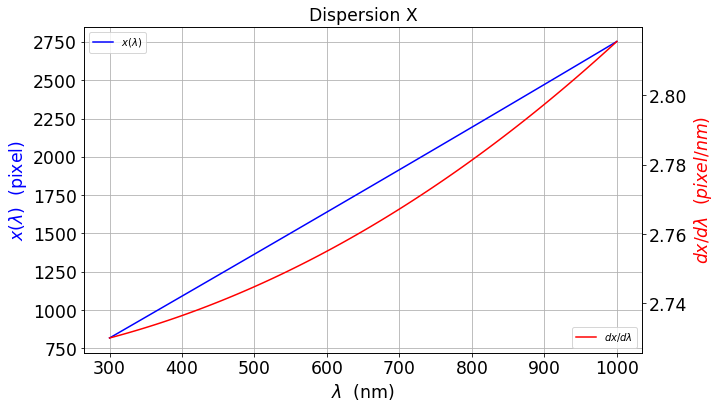

In [18]:
fig, ax1 = plt.subplots(figsize=(10,6))

Y1=Dispersion(WL*1e-6,neff,DCCD)/PIXELW   # pixel
ax1.plot(WL,Y1,"b",label="$x(\lambda)$")

ax1.set_xlabel("$\lambda$  (nm)")
ax1.set_ylabel("$x(\lambda)$  (pixel)",color="blue")
ax1.set_title("Dispersion X")
ax1.legend(loc="upper left")
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

Y2=Dispersion_Rate(WL*1e-6,neff,DCCD)/PIXELW*1e-6   # pixel per nm
ax2.plot(WL, Y2,"r",label="$dx/d\lambda$")
ax2.set_xlabel("$\lambda$  (nm)")
ax2.set_ylabel("$dx/d\lambda$  ($pixel/nm$)",color="red")
#ax2.set_title("Dispersion rate")
ax2.legend(loc="lower right")
#ax2.grid()
fig.savefig("DispersionFormula_pixel.pdf")


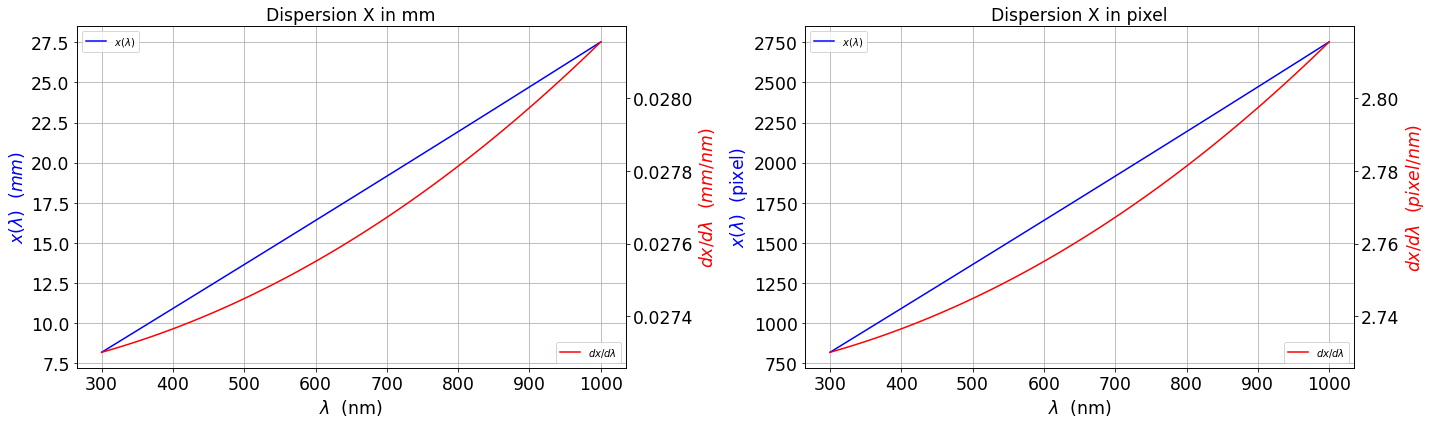

In [48]:
fig = plt.figure(figsize=(20,6))

ax1= fig.add_subplot(1,2,1)

Y1=Dispersion(WL*1e-6,neff,DCCD)
ax1.plot(WL,Y1,"b",label="$x(\lambda)$")

ax1.set_xlabel("$\lambda$  (nm)")
ax1.set_ylabel("$x(\lambda)$  ($mm$)",color="blue")
ax1.set_title("Dispersion X in mm")
ax1.legend(loc="upper left")
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

Y2=Dispersion_Rate(WL*1e-6,neff,DCCD)*1e-6 ## mm per nm
ax2.plot(WL, Y2,"r",label="$dx/d\lambda$")
ax2.set_xlabel("$\lambda$  (nm)")
ax2.set_ylabel("$dx/d\lambda$  ($mm/ nm$)",color="red")
#ax2.set_title("Dispersion rate")
ax2.legend(loc="lower right")
#ax2.grid()

ax3= fig.add_subplot(1,2,2)
Y1=Dispersion(WL*1e-6,neff,DCCD)/PIXELW   # pixel
ax3.plot(WL,Y1,"b",label="$x(\lambda)$")

ax3.set_xlabel("$\lambda$  (nm)")
ax3.set_ylabel("$x(\lambda)$  (pixel)",color="blue")
ax3.set_title("Dispersion X in pixel")
ax3.legend(loc="upper left")
ax3.grid()

ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis

Y2=Dispersion_Rate(WL*1e-6,neff,DCCD)/PIXELW*1e-6   # pixel per nm
ax4.plot(WL, Y2,"r",label="$dx/d\lambda$")
ax4.set_xlabel("$\lambda$  (nm)")
ax4.set_ylabel("$dx/d\lambda$  ($pixel/nm$)",color="red")
#ax2.set_title("Dispersion rate")
ax4.legend(loc="lower right")

plt.tight_layout()


# Read data from narrow and wide scan

In [20]:
file_csv="narrowwidescan_2021-07-07.csv"
file_xlsx="narrowwidescan_2021-07-07.xlsx"

In [21]:
df= pd.read_csv(file_csv, index_col=0)

In [22]:
df

,X(mm),Y(mm),degré,tag,Xpix,Neff,FlagGood,NarrowScan,wl_halpha,wl_o2,Xpix0,Ypix0,Xpix_halpha,Ypix_halpha,Xpix_o2,Ypix_o2
0,-6.834332,13.536706,0.304839,248,1353.670602,154.554555,True,False,656.433533,762.904358,1316.566809,681.329398,998.0,194.781104,1302.0,196.462393
1,-5.879631,12.273796,0.287949,249,1227.379635,154.654655,True,False,655.277649,764.469604,1412.036908,807.620365,1000.0,192.529519,1312.0,194.225394
2,-16.641820,1.325806,0.162526,250,132.580559,154.154154,True,False,656.279419,763.033386,335.818025,1902.419441,1002.0,189.400261,1306.0,190.218351
3,-16.236803,1.326900,0.193625,251,132.690005,154.554555,True,False,656.558716,763.020081,376.319657,1902.309995,1002.0,188.272972,1306.0,189.190892
4,-16.358922,1.439759,0.175763,252,143.975923,154.954955,True,False,656.375610,763.201843,364.107844,1891.024077,1002.0,188.444617,1308.0,189.337364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-18.921111,2.113223,-0.179557,345,211.322273,155.155155,True,True,656.329956,763.012756,107.888852,1823.677727,1002.0,171.129618,1308.0,170.565250
60,-18.938706,1.126771,-0.174666,346,112.677052,154.254254,True,True,656.437256,763.130127,106.129419,1922.322948,1002.0,175.935336,1306.0,175.433712
61,-18.865694,0.111250,-0.175392,347,11.125003,154.254254,True,True,656.377991,763.046570,113.430571,2023.874997,1002.0,173.628356,1306.0,173.105217
62,-18.874612,-0.863775,-0.176366,348,-86.377457,155.655656,True,True,656.125854,763.154846,112.538836,2121.377457,1002.0,174.560424,1310.0,174.022098


# Histograms

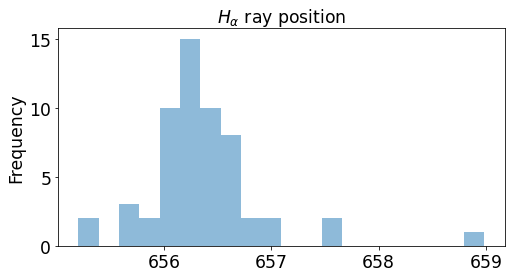

In [23]:
ax = df["wl_halpha"].plot.hist(bins=20, alpha=0.5,title="$H_\\alpha$ ray position",xlabel="$\\lambda$ (nm)")

In [24]:
df["wl_halpha"].describe()

count     57.000000
mean     656.361903
std        0.550562
min      655.198669
25%      656.124451
50%      656.324524
75%      656.538147
max      658.986389
Name: wl_halpha, dtype: float64

In [25]:
sigma_halpha=df["wl_halpha"].describe()["std"]*2.8
sigma_halpha # error on pixels for Halpha

1.541572804722561

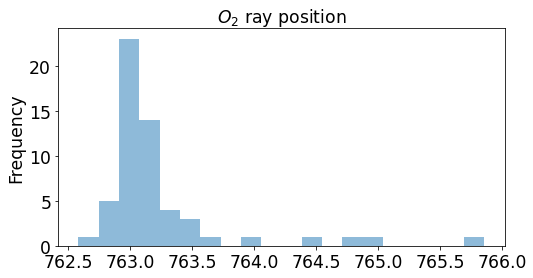

In [26]:
ax = df["wl_o2"].plot.hist(bins=20, alpha=0.5,title="$O_2$ ray position",xlabel="$\\lambda$ (nm)")

In [27]:
df["wl_o2"].describe()

count     56.000000
mean     763.246337
std        0.555498
min      762.582642
25%      763.012466
50%      763.055725
75%      763.218903
max      765.857910
Name: wl_o2, dtype: float64

In [28]:
sigma_O2=df["wl_o2"].describe()["std"]*2.8
sigma_O2

1.5553948769027843

In [29]:
sigma_pix=np.sqrt(sigma_halpha**2+sigma_O2**2 )
sigma_pix

2.189908659135264

In [49]:
# Too much optimistic, in reality one must increase the number of lines
sigma_pix=1

# Select one spectrum

In [31]:
index=0

In [32]:
row = df.iloc[index]

In [33]:
row

X(mm)            -6.834332
Y(mm)            13.536706
degré             0.304839
tag                    248
Xpix           1353.670602
Neff            154.554555
FlagGood              True
NarrowScan           False
wl_halpha       656.433533
wl_o2           762.904358
Xpix0          1316.566809
Ypix0           681.329398
Xpix_halpha          998.0
Ypix_halpha     194.781104
Xpix_o2             1302.0
Ypix_o2         196.462393
Name: 0, dtype: object

In [34]:
X0=row["Xpix0"]
X1=row["Xpix_halpha"]
Y1=row["Ypix_halpha"]

X2=row["Xpix_o2"]
Y2=row["Ypix_o2"]

WL1=row["wl_halpha"]
WL2=row["wl_o2"]

alpha= Angle(row["degré"],u.degree).radian

In [35]:
def Neff():
    
    lambda1 = WL1*1e-6 #mm
    lambda2 = WL2*1e-6 #mm
    
    neff = 1/DCCD*(X2-X1)*PIXELW/(lambda2-lambda1)
    
    return neff

In [36]:
def Chi2_0(Neff):
    
    lambda1_neff = WL1*Neff*1e-6 #mm
    lambda2_neff = WL2*Neff*1e-6 #mm
    
    chi2= ( (X2-X1)*PIXELW - DCCD*(lambda2_neff-lambda1_neff) )**2/sigma_pix**2
    

    return chi2

In [37]:
def Chi2_1(Neff):
    
    lambda1_neff = WL1*Neff*1e-6 #mm
    lambda2_neff = WL2*Neff*1e-6 #mm
    
    chi2= ( (X2-X1)*PIXELW - DCCD*(lambda2_neff/np.sqrt(1-lambda2_neff**2)-lambda1_neff/np.sqrt(1-lambda1_neff**2)))**2/sigma_pix**2
    

    return chi2

In [38]:
def Chi2_2(Neff):
    
    lambda1_neff = WL1*Neff*1e-6 #mm
    lambda2_neff = WL2*Neff*1e-6 #mm
    
    chi2= ((X1)*PIXELW - np.cos(alpha)*DCCD*lambda1_neff/np.sqrt(1-lambda1_neff**2))**2+ \
     ((X2)*PIXELW - np.cos(alpha)*DCCD*lambda2_neff/np.sqrt(1-lambda2_neff**2))**2 
   
    
    return chi2    

In [39]:
def Chi2_3(Neff):
    
    lambda1_neff = WL1*Neff*1e-6 #mm
    lambda2_neff = WL2*Neff*1e-6 #mm
    
    chi2= (X1*PIXELW - np.cos(alpha)*DCCD*lambda1_neff/np.sqrt(1-lambda1_neff**2))**2+ \
    (Y1*PIXELW - np.sin(alpha)*DCCD*lambda1_neff/np.sqrt(1-lambda1_neff**2))**2+ \
     (X2*PIXELW - np.cos(alpha)*DCCD*lambda2_neff/np.sqrt(1-lambda2_neff**2))**2+ \
    (Y2*PIXELW - np.sin(alpha)*DCCD*lambda2_neff/np.sqrt(1-lambda2_neff**2))**2
    
    return chi2    

In [40]:
all_neff = np.linspace(100,200)

In [41]:
all_neff

array([100.        , 102.04081633, 104.08163265, 106.12244898,
       108.16326531, 110.20408163, 112.24489796, 114.28571429,
       116.32653061, 118.36734694, 120.40816327, 122.44897959,
       124.48979592, 126.53061224, 128.57142857, 130.6122449 ,
       132.65306122, 134.69387755, 136.73469388, 138.7755102 ,
       140.81632653, 142.85714286, 144.89795918, 146.93877551,
       148.97959184, 151.02040816, 153.06122449, 155.10204082,
       157.14285714, 159.18367347, 161.2244898 , 163.26530612,
       165.30612245, 167.34693878, 169.3877551 , 171.42857143,
       173.46938776, 175.51020408, 177.55102041, 179.59183673,
       181.63265306, 183.67346939, 185.71428571, 187.75510204,
       189.79591837, 191.83673469, 193.87755102, 195.91836735,
       197.95918367, 200.        ])

In [42]:
chi2_0 = Chi2_0(all_neff)

In [43]:
idx = np.where( chi2_0 == chi2_0.min())[0][0]

In [44]:
all_neff[idx]

157.14285714285714

In [45]:
chi2_0 = Chi2_0(all_neff)
idx = np.where( chi2_0 == chi2_0.min())[0][0]
neff0 = all_neff[idx]

chi2_1 = Chi2_1(all_neff)
idx = np.where( chi2_1 == chi2_1.min())[0][0]
neff1 = all_neff[idx]

chi2_2 = Chi2_2(all_neff)
idx = np.where( chi2_2 == chi2_2.min())[0][0]
neff2 = all_neff[idx]

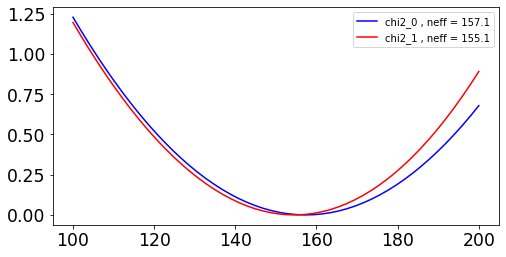

In [46]:
chi2_0 = Chi2_0(all_neff)

label0 = f"chi2_0 , neff = {neff0:.1f}"
label1 = f"chi2_1 , neff = {neff1:.1f}"
label2 = f"chi2_2 , neff = {neff1:.1f}"

plt.plot(all_neff,chi2_0,'b-',label=label0)
plt.plot(all_neff,chi2_1, 'r-',label=label1)
plt.legend()
#plt.plot(all_neff,Chi2_2(all_neff))